In [1]:
import numpy as np
from icecream import ic
import circle_fit as circle
from tracker_coordinate_transform import *
from trackercal import *


In [2]:
with open("circle_samples_5.txt", 'r') as file:
    circle_samples = eval(file.read())

#circle_samples

In [3]:
# negate the x values in circle_samples
circle_samples = negate_xvalues(circle_samples)

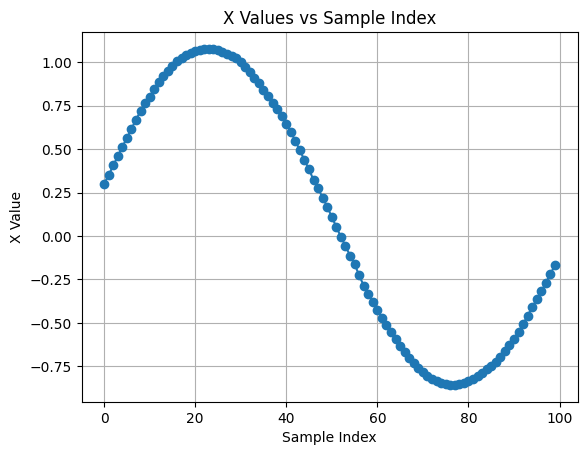

In [4]:
import matplotlib.pyplot as plt

# Extract x values
x_values_circle_samples = extract_xvalues(circle_samples)
plot_samples(x_values_circle_samples,'X Values vs Sample Index','X Value')


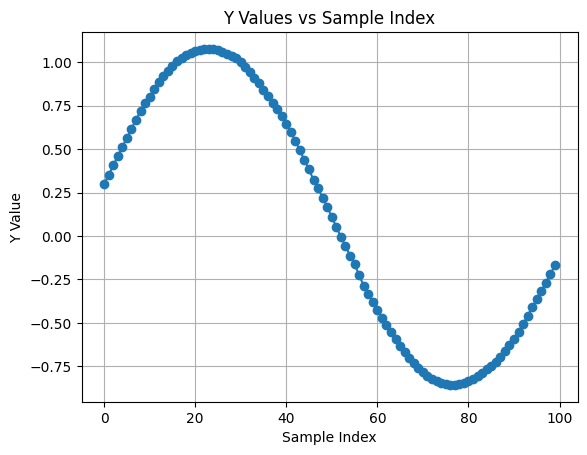

In [5]:
import matplotlib.pyplot as plt

# Extract x values
y_values_circle_samples = extract_yvalues(circle_samples)
plot_samples(x_values_circle_samples,'Y Values vs Sample Index','Y Value')


Calculated circle with error:  0.007009151965696036  xc:  0.10999704784128529  yc:  -3.3580813994043517  r:  0.9673497656586187


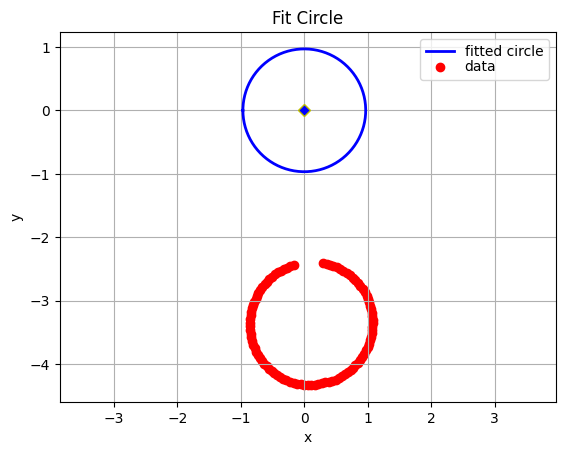

In [6]:
xc, yc, r, sigma = circle.standardLSQ(circle_samples)

print("Calculated circle with error: ", sigma, " xc: ", xc, " yc: ", yc, " r: ", r)
circle.plot_data_circle(circle_samples, 0, 0, r)


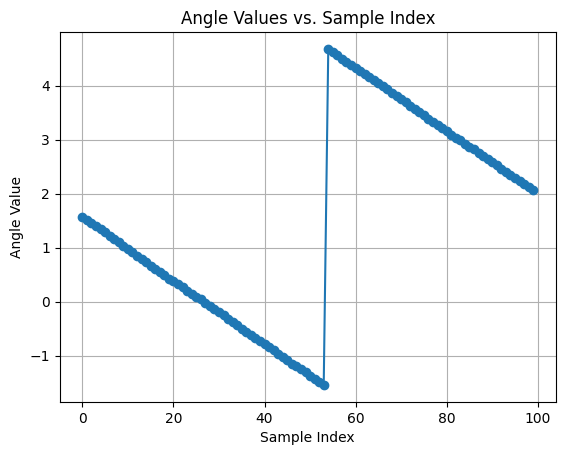

In [7]:
# Plot angle from starting point for each sample in the FRC coordinate system
# Extract angle values

angle_values = get_angle_values(circle_samples, xc, yc,initial_angle=np.pi/2)
plot_samples(angle_values,"Angle Values vs. Sample Index", "Angle Value")


In [8]:
# Calculate the (x,y) points for the calibration circle in the FRC coordinates, using the known starting point (0,r),
# known center point (0,0), the radius r, and the angle values from VR sampled data points.
FRC_circle_samples = calculate_FRC_samples(circle_samples, xc, yc, r, initial_angle=np.pi/2)

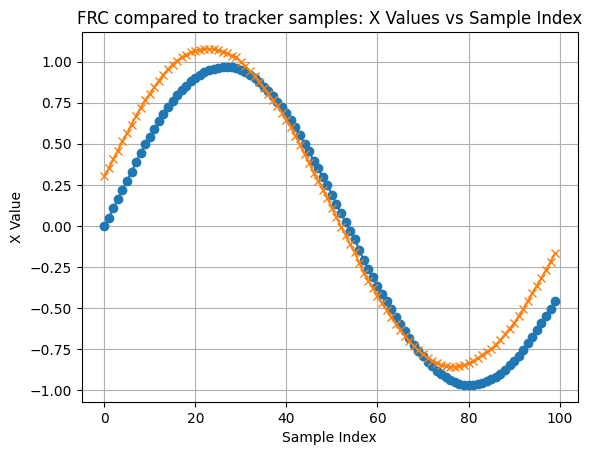

In [9]:
# Extract x values
x_values_FRC_circle_samples = extract_xvalues(FRC_circle_samples)
plot_samples_2(x_values_FRC_circle_samples, x_values_circle_samples, 'FRC compared to tracker samples: X Values vs Sample Index', 'X Value')


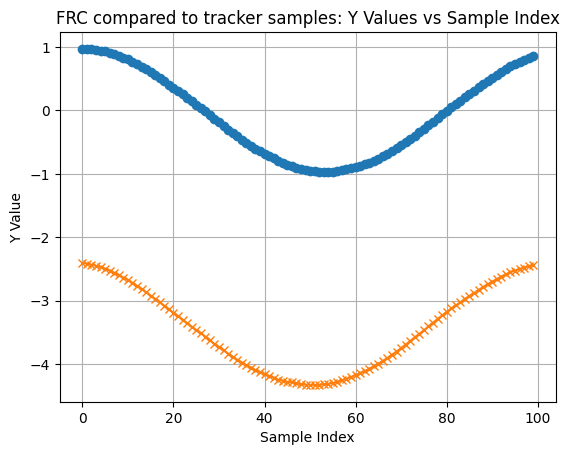

In [10]:
# Extract y values
y_values_FRC_circle_samples = extract_yvalues(FRC_circle_samples)
plot_samples_2(y_values_FRC_circle_samples, y_values_circle_samples, 
               'FRC compared to tracker samples: Y Values vs Sample Index', 'Y Value')


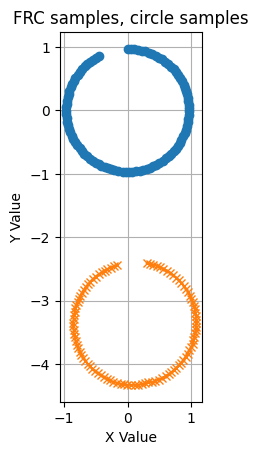

In [11]:
plot_circles_from_samples(x_values_FRC_circle_samples, y_values_FRC_circle_samples, x_values_circle_samples, y_values_circle_samples, 
                     'FRC samples, circle samples', 'X Value', 'Y Value')

In [12]:
R, s, t = find_transformation_params(circle_samples, FRC_circle_samples)
print(f"Rotation matrix: {R}")
print(f"Scale factor: {s}")
print(f"Translation vector: {t}")

Rotation matrix: [[ 0.98046806 -0.19667839]
 [ 0.19667839  0.98046806]]
Scale factor: 0.9999736021100861
Translation vector: [-0.76828999  3.27076928]


In [13]:
# transform the original set of VR sample points using the derived transformation constants. 
# These should match the "generated" FRC_circle_samples
FRC_circle_samples_verify = [transform_coordinates(point,R, s, t) for point in circle_samples]
#FRC_circle_samples_verify = [transform_coordinates(point,np.eye(2), 1.0, np.zeros(2)) for point in circle_samples] # no change configuration
print(f"Initial point (should be (0,{r})): {FRC_circle_samples_verify[0]}")

Initial point (should be (0,0.9673497656586187)): [3.74926047e-07 9.71110412e-01]


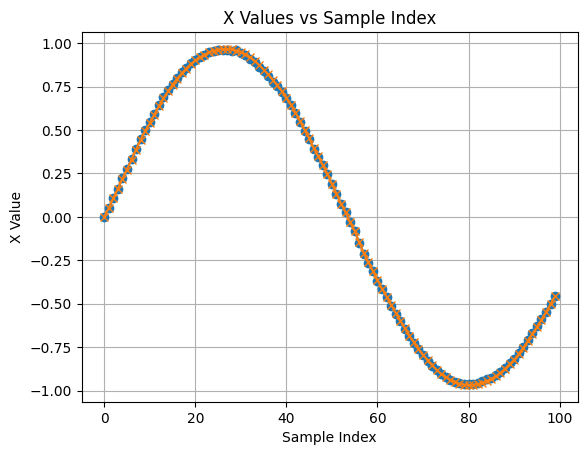

In [14]:
# compare the transformed points with the generated FRC_circle_samples
x_values_FRC_circle_samples_verify = extract_xvalues(FRC_circle_samples_verify)
plot_samples_2(x_values_FRC_circle_samples_verify, x_values_FRC_circle_samples, 'X Values vs Sample Index', 'X Value')


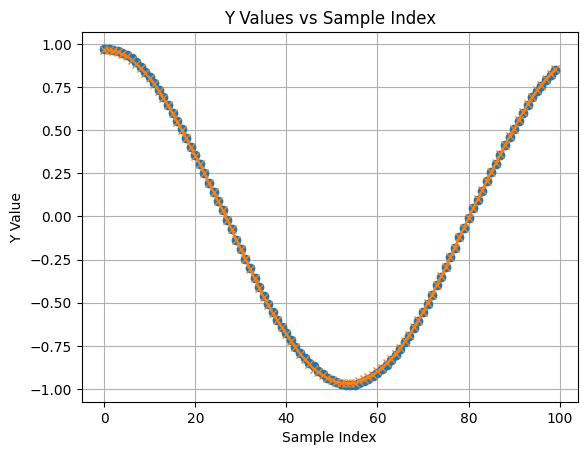

In [15]:
# Compare the transformed points with the generated FRC_circle_samples
y_values_FRC_circle_samples_verify = extract_yvalues(FRC_circle_samples_verify)
plot_samples_2(y_values_FRC_circle_samples_verify, y_values_FRC_circle_samples, 'Y Values vs Sample Index', 'Y Value')

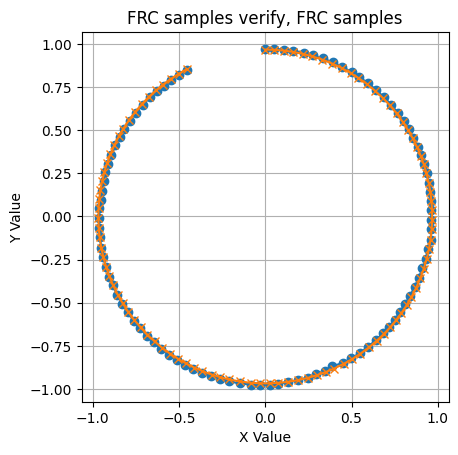

In [16]:
# Compare the transformed points with the generated FRC_circle_samples
plot_circles_from_samples(x_values_FRC_circle_samples_verify, y_values_FRC_circle_samples_verify, x_values_FRC_circle_samples, y_values_FRC_circle_samples,
                            'FRC samples verify, FRC samples', 'X Value', 'Y Value')
                            


# Try again with a subset of the sample points

In [17]:
# Try with subset of the calibration points
# sample every 10th point and then use only the first 6 resulting points
circle_samples_subset = ic(samples_subset(circle_samples, 10, 6))
FRC_circle_samples_subset = ic(samples_subset(FRC_circle_samples, 10, 6))

ic| samples_subset(circle_samples, 10, 6): [(0.7655648589134216, -2.6358156204223633),
                                            (1.0556387901306152, -3.137481451034546),
                                            (1.026045799255371, -3.680377960205078),
                                            (0.6894568800926208, -4.1250810623168945),
                                            (0.16872051358222961, -4.321870803833008),
                                            (-0.3792930841445923, -4.202536106109619)]
ic| samples_subset(FRC_circle_samples, 10, 6): [(np.float64(0.49656842585804617), np.float64(0.8301718903700889)),
                                                (np.float64(0.880433128271816), np.float64(0.40075313568491094)),
                                                (np.float64(0.9578395005013366), np.float64(-0.1353109766394979)),
                                                (np.float64(0.7235328772795669), np.float64(-0.6420792354650131)),
                      

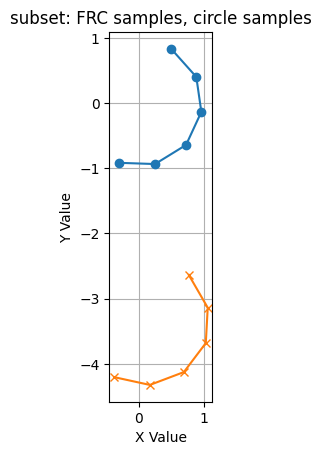

In [18]:
plot_circles_from_samples(extract_xvalues(FRC_circle_samples_subset), extract_yvalues(FRC_circle_samples_subset),
                            extract_xvalues(circle_samples_subset), extract_yvalues(circle_samples_subset),
                            'subset: FRC samples, circle samples', 'X Value', 'Y Value')


In [19]:
R, s, t = find_transformation_params(circle_samples_subset, FRC_circle_samples_subset)
print(f"Rotation matrix: {R}")
print(f"Scale factor: {s}")
print(f"Translation vector: {t}")

Rotation matrix: [[ 0.98028435 -0.19759198]
 [ 0.19759198  0.98028435]]
Scale factor: 0.9959649340499136
Translation vector: [-0.76701719  3.2546268 ]


In [20]:
# transform the original set of VR sample points using the derived transformation constants. 
# These should match the "generated" FRC_circle_samples
FRC_circle_samples_verify = [transform_coordinates(point,R, s, t) for point in circle_samples]
#FRC_circle_samples_verify = [transform_coordinates(point,np.eye(2), 1.0, np.zeros(2)) for point in circle_samples] # no change configuration
print(f"Initial point (should be (0,{r})): {FRC_circle_samples_verify[0]}")

Initial point (should be (0,0.9673497656586187)): [3.27354042e-04 9.64900820e-01]


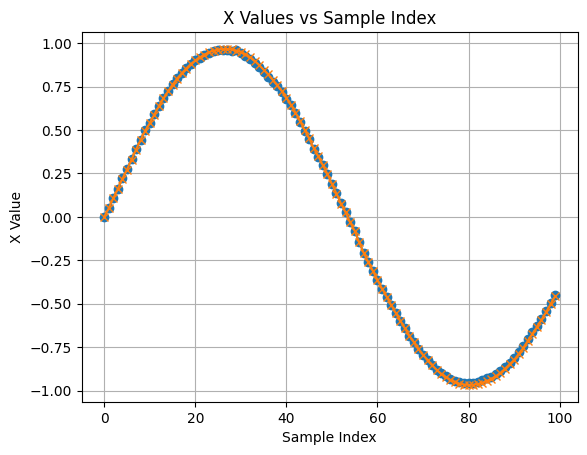

In [21]:
# compare the transformed points with the generated FRC_circle_samples
x_values_FRC_circle_samples_verify = extract_xvalues(FRC_circle_samples_verify)
plot_samples_2(x_values_FRC_circle_samples_verify, x_values_FRC_circle_samples, 'X Values vs Sample Index', 'X Value')


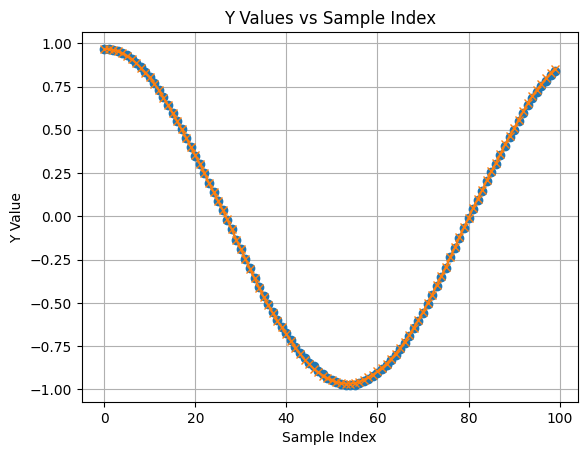

In [22]:
# Compare the transformed points with the generated FRC_circle_samples
y_values_FRC_circle_samples_verify = extract_yvalues(FRC_circle_samples_verify)
plot_samples_2(y_values_FRC_circle_samples_verify, y_values_FRC_circle_samples, 'Y Values vs Sample Index', 'Y Value')

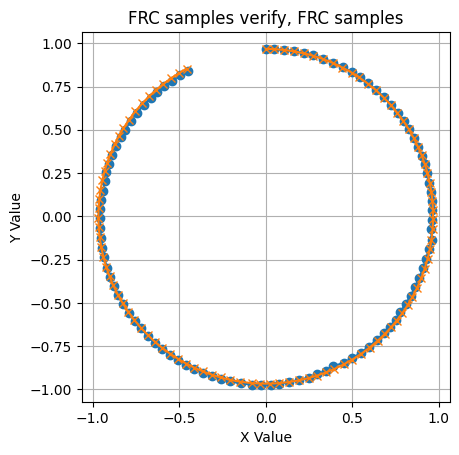

In [23]:
# Compare the transformed points with the generated FRC_circle_samples
plot_circles_from_samples(x_values_FRC_circle_samples_verify, y_values_FRC_circle_samples_verify, x_values_FRC_circle_samples, y_values_FRC_circle_samples,
                            'FRC samples verify, FRC samples', 'X Value', 'Y Value')
                            
